In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

<Axes: >

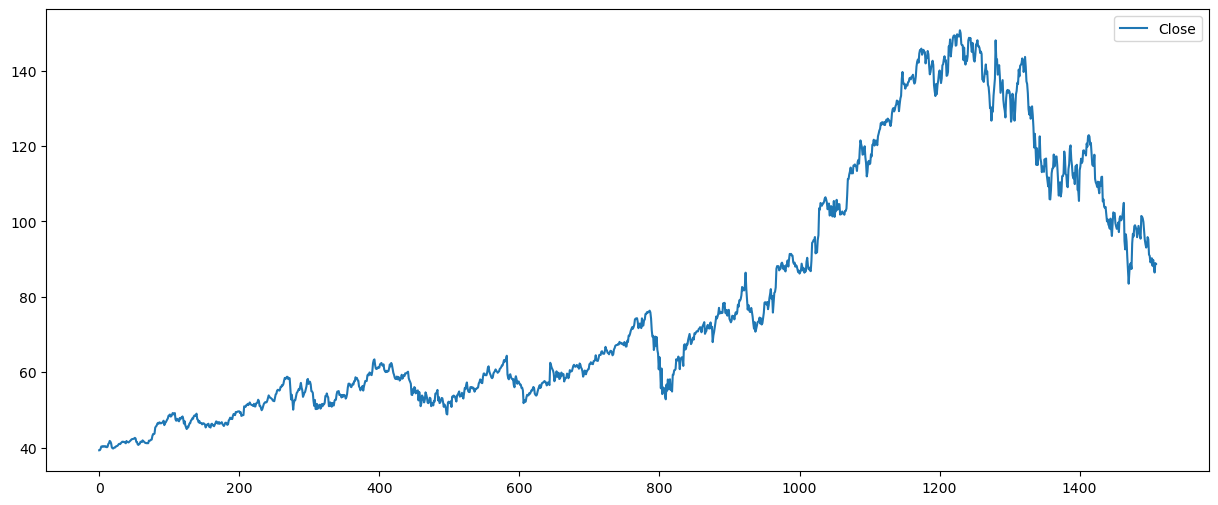

In [2]:
#Inputting the prices of Google stocks from 1 Jan 2017 to 31 Dec 2022
data=pd.read_csv(r'./GOOG.csv')
data.plot(figsize=(15,6))

In [3]:
#Calculating the drift of stock
log_return=np.log(1+data['Close'].pct_change())
u=log_return.mean()
v=log_return.var()
drift=u-0.5*v

Text(4.944444444444445, 0.5, 'Frequency')

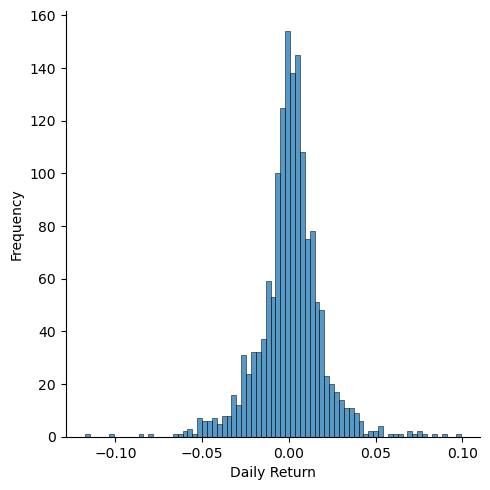

In [4]:
#Plotting the frequency of different daily returns
sns.displot(log_return.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [5]:
#calculating the daily return formula
stdev=log_return.std()
days=50
trials=1000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

In [6]:
#Code for monte carlo simulation
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]['Close']
idx=np.arange(1, days+1)
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

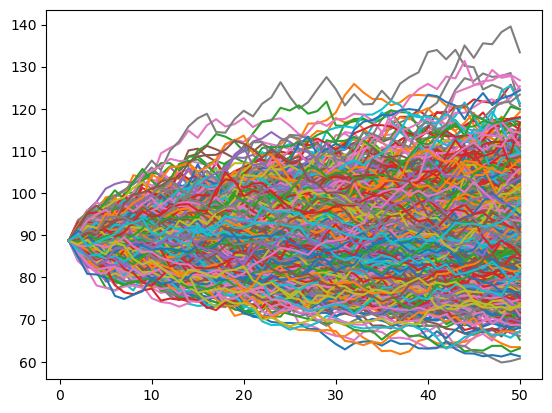

In [7]:
plt.plot(idx,price_paths)

In [8]:
perc_95=np.percentile(price_paths[-1], 95)
perc_5=np.percentile(price_paths[-1], 5)
perc_50=np.percentile(price_paths[-1], 50)

In [9]:
print(f"The 95th percentile score for the calculated for 19th february 2023 is {perc_95}")
print(f"The 50th percentile score for the calculated for 19th february 2023 is {perc_50}")
print(f"The 5th percentile score for the calculated for 19th february 2023 is {perc_5}")
print("The actual price at 21 February 2023 was 92.05")

The 95th percentile score for the calculated for 19th february 2023 is 110.95935130370626
The 50th percentile score for the calculated for 19th february 2023 is 90.22905223570021
The 5th percentile score for the calculated for 19th february 2023 is 72.65301265520408
The actual price at 21 February 2023 was 92.05
